2022 Datathon with ElderNet
<p>Client Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
clientinfo=pd.read_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/Client_data2.csv')

**Client Info**
1. Look at nulls/NAs
2. Calculate split by County
3. Calculate %Total Minority
4. Calculate %Minority by Age Group
5. Calculate Count by Age Group
6. Can we use Poverty flag?

In [4]:
# What does file look like?  Look at first three rows of data (and column labels)
clientinfo.head(3)

,anon_ID,county,poverty,minority,age_group
0,1,Montgomery,No,NaN,P
1,2,Montgomery,No,No,D
2,3,Montgomery,No,No,P


In [15]:
# How many records per column, and what data types?
clientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anon_ID    641 non-null    int64 
 1   county     641 non-null    object
 2   poverty    601 non-null    object
 3   minority   156 non-null    object
 4   age_group  424 non-null    object
dtypes: int64(1), object(4)
memory usage: 25.2+ KB


In [6]:
# Check for nulls
clientinfo.isnull().sum()

anon_ID        0
county         0
poverty       40
minority     485
age_group    217
dtype: int64

In [12]:
client_pov=clientinfo.groupby(['poverty'],as_index=False)['anon_ID'].count()
povSum=client_pov['anon_ID'].sum()
client_pov.rename(columns={'anon_ID':'countByID'},inplace=True)

client_pov['Percent']=(100 * client_pov['countByID']/povSum).map('{:.2f}'.format)
client_pov.head()

,poverty,countByID,Percent
0,No,215,35.77
1,Yes,386,64.23


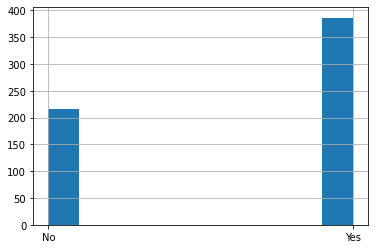

In [7]:
clientinfo['poverty'].hist()

In [16]:
client_county=clientinfo.groupby(['county'],as_index=False)['anon_ID'].count()
countySum=client_county['anon_ID'].sum()
client_county.rename(columns={'anon_ID':'countByID'},inplace=True)

client_county['Percent']=(100 * client_county['countByID']/countySum).map('{:.2f}'.format)
client_county.head()

,county,countByID,Percent
0,Montgomery,601,93.76
1,Other,40,6.24


In [18]:
client_age=clientinfo.groupby(['age_group'],as_index=False)['anon_ID'].count()
ageSum=client_age['anon_ID'].sum()
client_age.rename(columns={'anon_ID':'countByID'},inplace=True)

client_age['Percent']=(100 * client_age['countByID']/ageSum).map('{:.2f}'.format)
client_age.head()

,age_group,countByID,Percent
0,D,95,22.41
1,G,174,41.04
2,P,64,15.09
3,T,91,21.46


In [20]:
client_age_pov=clientinfo.groupby(['age_group','poverty'],as_index=False)['anon_ID'].count()
agePovSum=client_age_pov['anon_ID'].sum()
client_age_pov.rename(columns={'anon_ID':'countByID'},inplace=True)

client_age_pov['Percent']=(100 * client_age_pov['countByID']/agePovSum).map('{:.2f}'.format)
client_age_pov.head()

,age_group,poverty,countByID,Percent
0,D,No,47,11.08
1,D,Yes,48,11.32
2,G,No,52,12.26
3,G,Yes,122,28.77
4,P,No,38,8.96


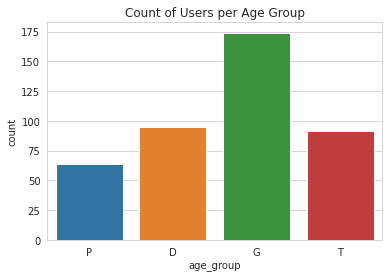

In [22]:
plt.title('Count of Users per Age Group')
sns.set_style('whitegrid')
sns.countplot(x='age_group',data=clientinfo,)

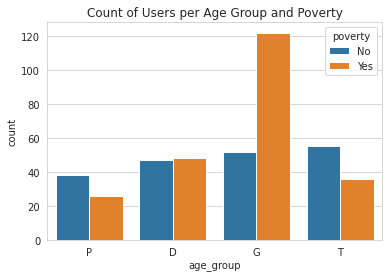

In [23]:
plt.title('Count of Users per Age Group and Poverty')
sns.set_style('whitegrid')
sns.countplot(x='age_group',data=clientinfo,hue='poverty')

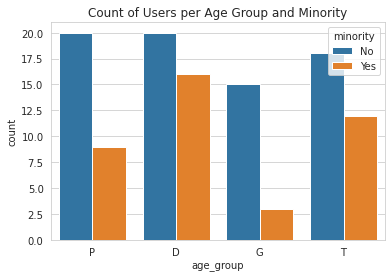

In [24]:
plt.title('Count of Users per Age Group and Minority')
sns.set_style('whitegrid')
sns.countplot(x='age_group',data=clientinfo,hue='minority')

After flatten, what joins make sense?

In [ ]:
#clientinfo=clientinfo.drop(clientinfo.columns[[0]],axis=1)

In [ ]:
 #clientinfo.to_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/clientinfo_flat.csv')

In [ ]:
# Convert the four age groups into n-1 age groups (0,0,0 implies 4th/dropped age groups)
# Stated differently, convert the text categories into integers so can apply calculations
#clientinfo_final=pd.get_dummies(clientinfo,columns=['age_group'],drop_first=True)

In [ ]:
#clientinfo_final.head()